# Data Preprocessing

## Steps
### 1. Handling Missing Data
### 2. Outlier Removal
### 3. Encoding
#### ------I.  Label Encoding
#### ------II. Onehot Encoding
### 4. Scaling
#### ------I.  Normalization
#### ------II. Standardization
### 5. Feature Selection

## Import Libraries

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Dataset

In [285]:
# Load the dataset
data = pd.read_csv('loan_data.csv')

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [286]:
#shape
data.shape

(45000, 14)

In [287]:
#info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# Step 01: Handling Missing Data

In [288]:
#finding missing values
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [289]:
#finding duplicates
dup_count = data.duplicated().sum()
print("Number of duplicate rows:", dup_count)

Number of duplicate rows: 0


## Data Analysis

In [290]:
#descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [291]:
data.describe(include="object")

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


# Step 02: Outlier Treatments

## Before

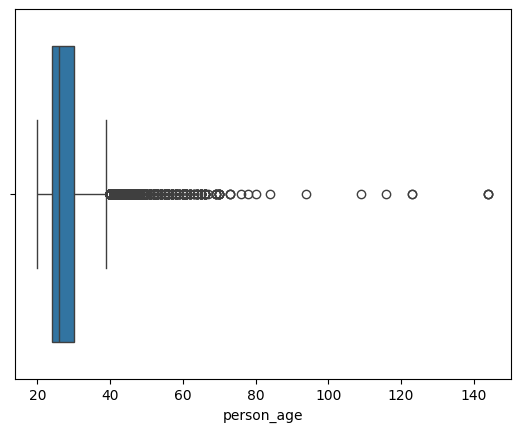

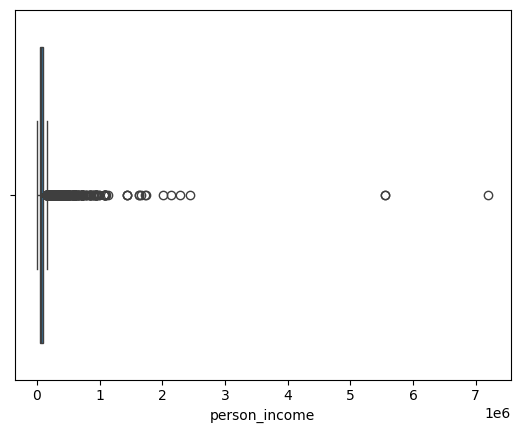

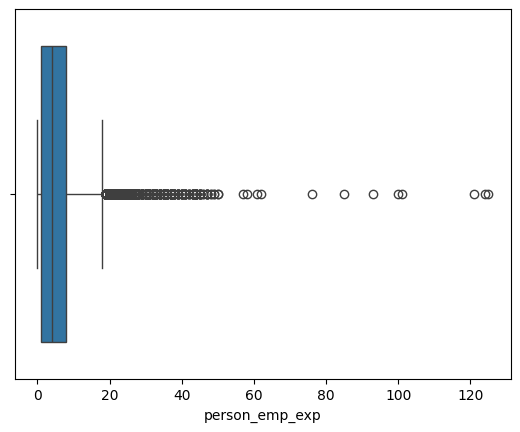

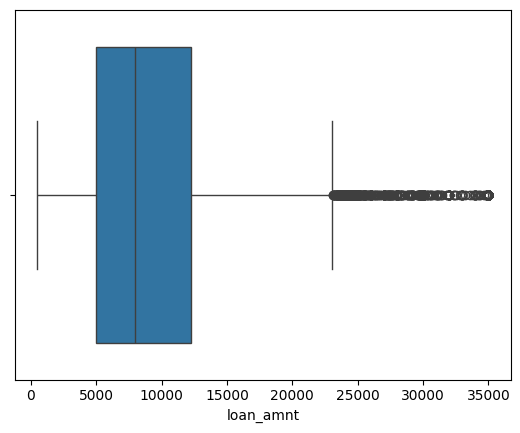

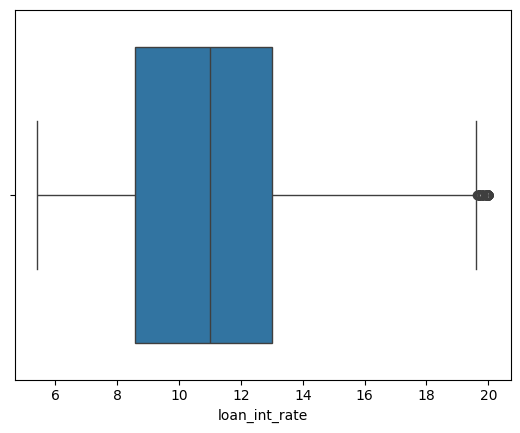

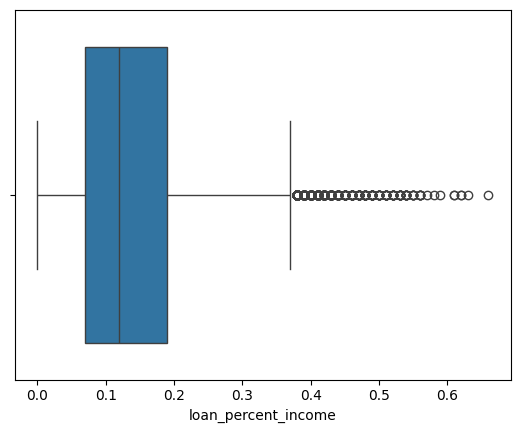

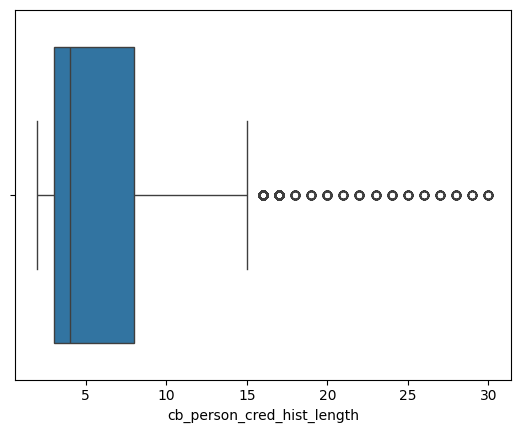

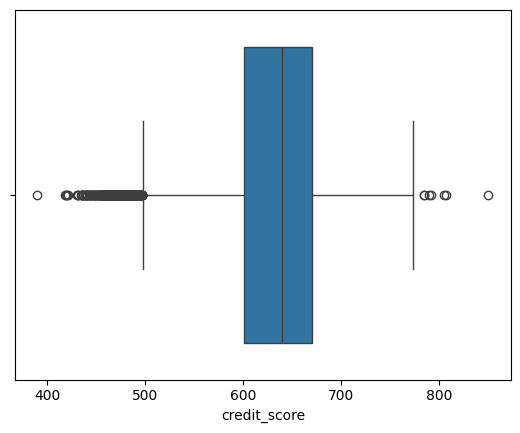

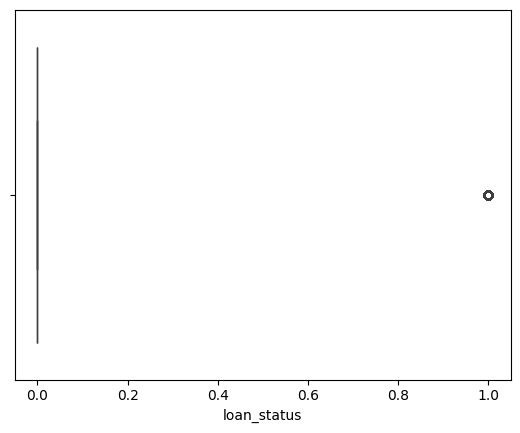

In [292]:
#Boxplot-to-identify outliers
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data = data, x = i)
    plt.show()
    plt.close()

## After

In [293]:
#decide wheather to do outliers treatment or not

In [294]:
def wisker(col):
    q1,q3=np.percentile(col, [25,75])
    iqr=q3-q1
    lw = q1-1.5*iqr
    uw = q3+1.5*iqr
    return lw,uw

In [295]:
wisker(data['credit_score'])

(np.float64(497.5), np.float64(773.5))

In [296]:
for i in ['credit_score','person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income', 'cb_person_cred_hist_length',]:
    lw,uw=wisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])

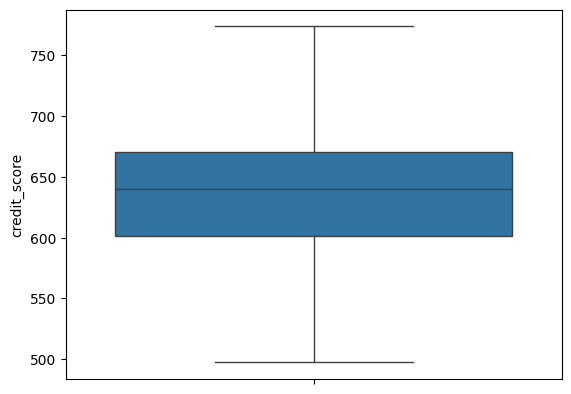

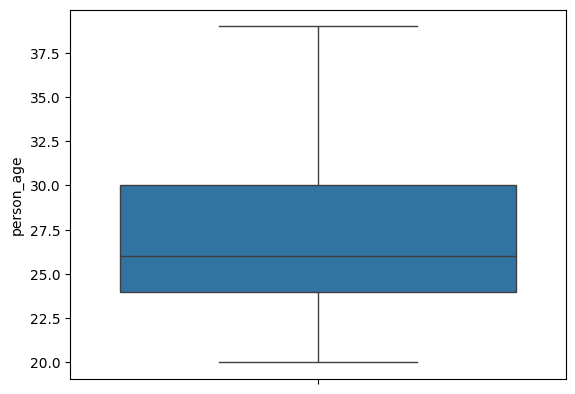

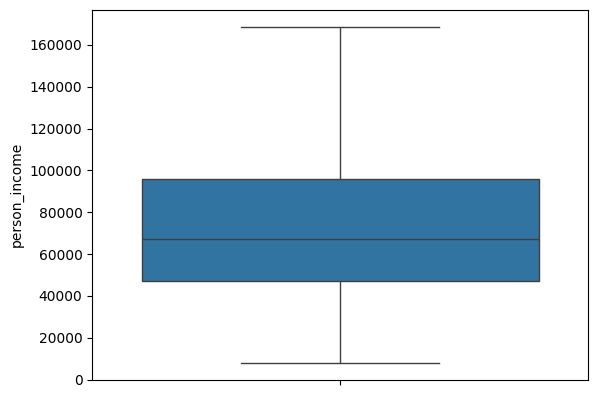

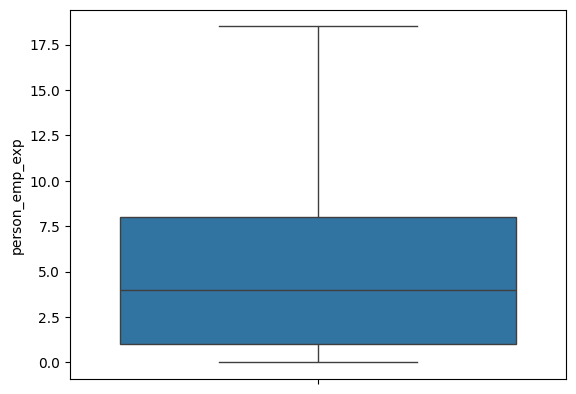

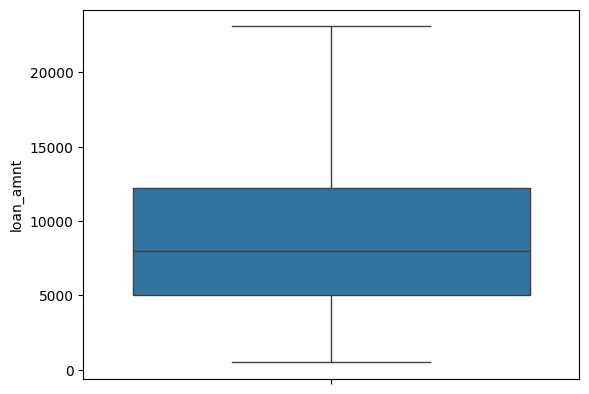

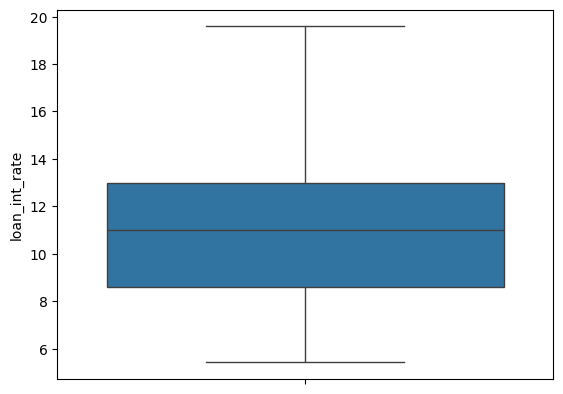

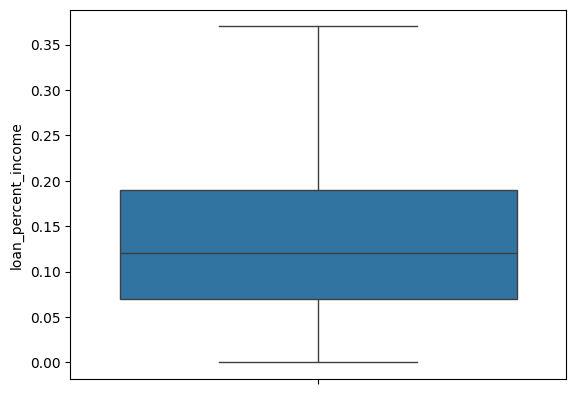

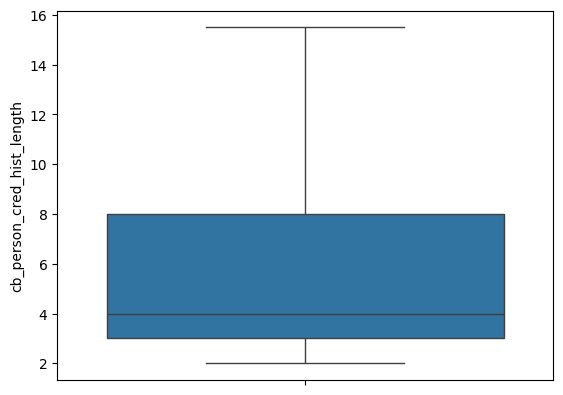

In [297]:
for i in ['credit_score','person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income', 'cb_person_cred_hist_length',]:
    sns.boxplot(data[i])
    plt.show()
    plt.close()

# Step 03: Encoding

In [298]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.000,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,25.0,female,High School,12438.0,3.0,MORTGAGE,5500.000,MEDICAL,12.87,0.37,3.0,635.0,No,1
3,23.0,female,Bachelor,79753.0,0.0,RENT,23093.125,MEDICAL,15.23,0.37,2.0,675.0,No,1
4,24.0,male,Master,66135.0,1.0,RENT,23093.125,MEDICAL,14.27,0.37,4.0,586.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6.0,RENT,15000.000,MEDICAL,15.66,0.31,3.0,645.0,No,1
44996,37.0,female,Associate,65800.0,17.0,RENT,9000.000,HOMEIMPROVEMENT,14.07,0.14,11.0,621.0,No,1
44997,33.0,male,Associate,56942.0,7.0,RENT,2771.000,DEBTCONSOLIDATION,10.02,0.05,10.0,668.0,No,1
44998,29.0,male,Bachelor,33164.0,4.0,RENT,12000.000,EDUCATION,13.23,0.36,6.0,604.0,No,1


## I. Label Encoding

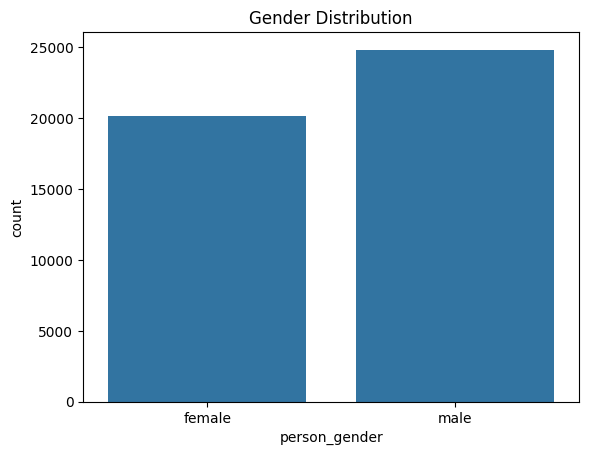

In [299]:
# Before label encoding
sns.countplot(x="person_gender", data=data)
plt.title("Gender Distribution")
plt.show()

In [300]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['person_gender'] = le.fit_transform(data['person_gender'])
data['previous_loan_defaults_on_file'] = le.fit_transform(data['previous_loan_defaults_on_file'])

In [301]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,561.0,0,1
1,21.0,0,High School,12282.0,0.0,OWN,1000.000,EDUCATION,11.14,0.08,2.0,504.0,1,0
2,25.0,0,High School,12438.0,3.0,MORTGAGE,5500.000,MEDICAL,12.87,0.37,3.0,635.0,0,1
3,23.0,0,Bachelor,79753.0,0.0,RENT,23093.125,MEDICAL,15.23,0.37,2.0,675.0,0,1
4,24.0,1,Master,66135.0,1.0,RENT,23093.125,MEDICAL,14.27,0.37,4.0,586.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,Associate,47971.0,6.0,RENT,15000.000,MEDICAL,15.66,0.31,3.0,645.0,0,1
44996,37.0,0,Associate,65800.0,17.0,RENT,9000.000,HOMEIMPROVEMENT,14.07,0.14,11.0,621.0,0,1
44997,33.0,1,Associate,56942.0,7.0,RENT,2771.000,DEBTCONSOLIDATION,10.02,0.05,10.0,668.0,0,1
44998,29.0,1,Bachelor,33164.0,4.0,RENT,12000.000,EDUCATION,13.23,0.36,6.0,604.0,0,1


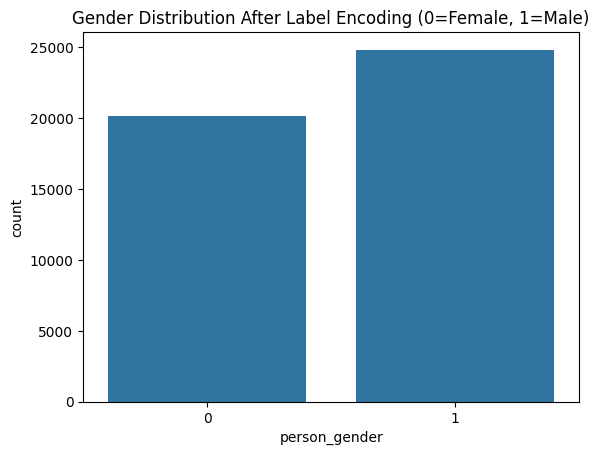

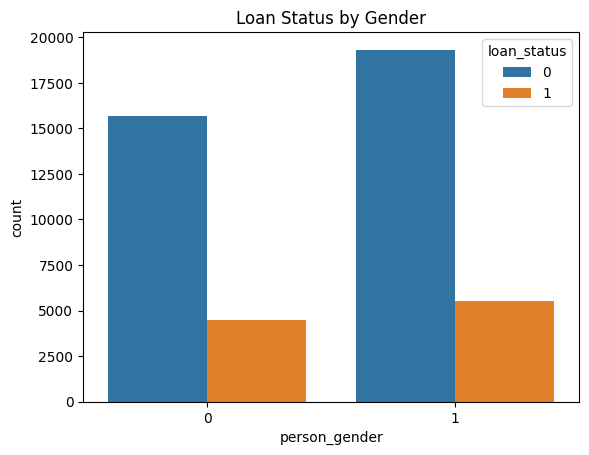

In [302]:
# After label encoding
sns.countplot(x="person_gender", data=data)
plt.title("Gender Distribution After Label Encoding (0=Female, 1=Male)")
plt.show()

pd.crosstab(data['person_gender'], data['loan_status'])

sns.countplot(x="person_gender", hue="loan_status", data=data)
plt.title("Loan Status by Gender")
plt.show()

## II. Onehot Encoding

### Before

In [303]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,561.0,0,1
1,21.0,0,High School,12282.0,0.0,OWN,1000.000,EDUCATION,11.14,0.08,2.0,504.0,1,0
2,25.0,0,High School,12438.0,3.0,MORTGAGE,5500.000,MEDICAL,12.87,0.37,3.0,635.0,0,1
3,23.0,0,Bachelor,79753.0,0.0,RENT,23093.125,MEDICAL,15.23,0.37,2.0,675.0,0,1
4,24.0,1,Master,66135.0,1.0,RENT,23093.125,MEDICAL,14.27,0.37,4.0,586.0,0,1


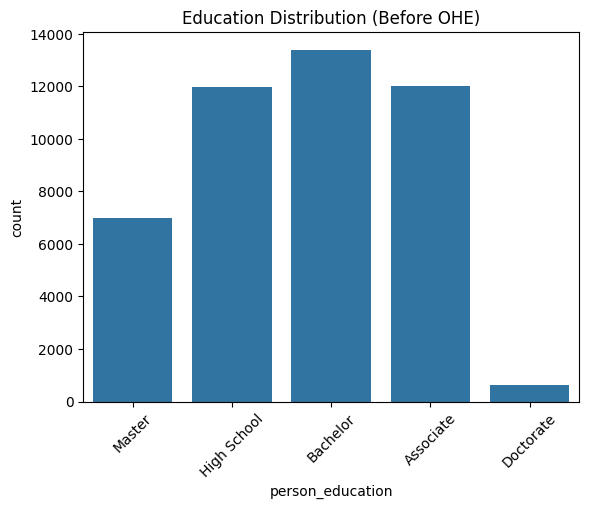

In [304]:
# 1. Education distribution
sns.countplot(x="person_education", data=data)
plt.title("Education Distribution (Before OHE)")
plt.xticks(rotation=45)
plt.show()

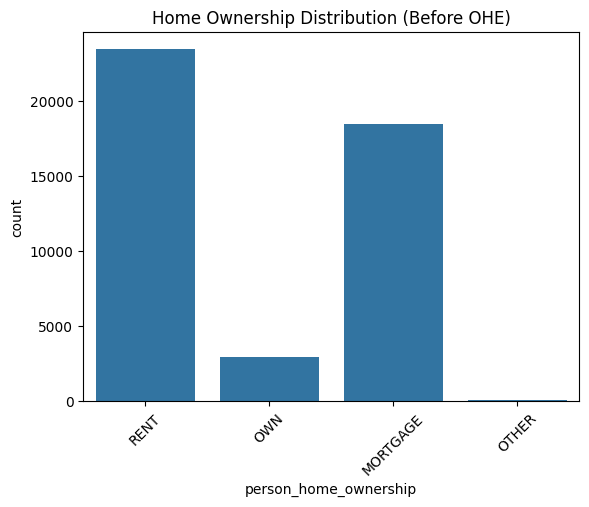

In [305]:
# 2. Home ownership distribution
sns.countplot(x="person_home_ownership", data=data)
plt.title("Home Ownership Distribution (Before OHE)")
plt.xticks(rotation=45)
plt.show()

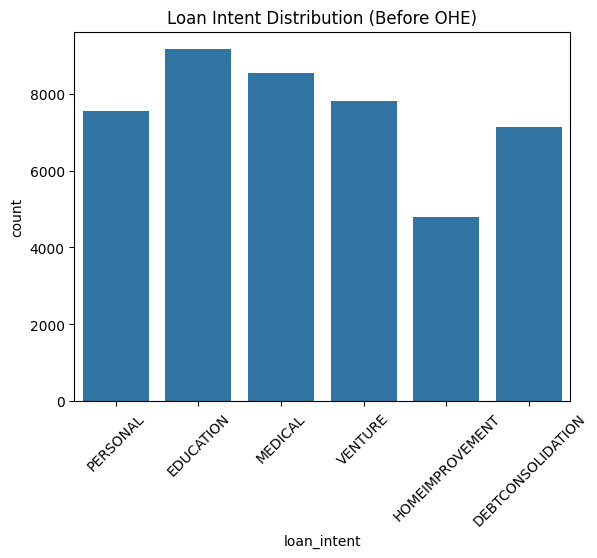

In [306]:
# 3. Loan intent distribution
sns.countplot(x="loan_intent", data=data)
plt.title("Loan Intent Distribution (Before OHE)")
plt.xticks(rotation=45)
plt.show()

## Encoding

In [307]:
data['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [308]:
categorical_cols = ['person_education', 'person_home_ownership', 'loan_intent']

from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohtransform = oh.fit_transform(data[categorical_cols])

In [309]:
ohtransform

,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
44997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [310]:
data = pd.concat([data, ohtransform], axis=1).drop(columns = ['person_education', 'person_home_ownership', 'loan_intent'])

In [311]:
data

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,71948.0,0.0,23093.125,16.02,0.37,3.0,561.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,0,12282.0,0.0,1000.000,11.14,0.08,2.0,504.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,0,12438.0,3.0,5500.000,12.87,0.37,3.0,635.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,0,79753.0,0.0,23093.125,15.23,0.37,2.0,675.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,1,66135.0,1.0,23093.125,14.27,0.37,4.0,586.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,47971.0,6.0,15000.000,15.66,0.31,3.0,645.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44996,37.0,0,65800.0,17.0,9000.000,14.07,0.14,11.0,621.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
44997,33.0,1,56942.0,7.0,2771.000,10.02,0.05,10.0,668.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44998,29.0,1,33164.0,4.0,12000.000,13.23,0.36,6.0,604.0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### After

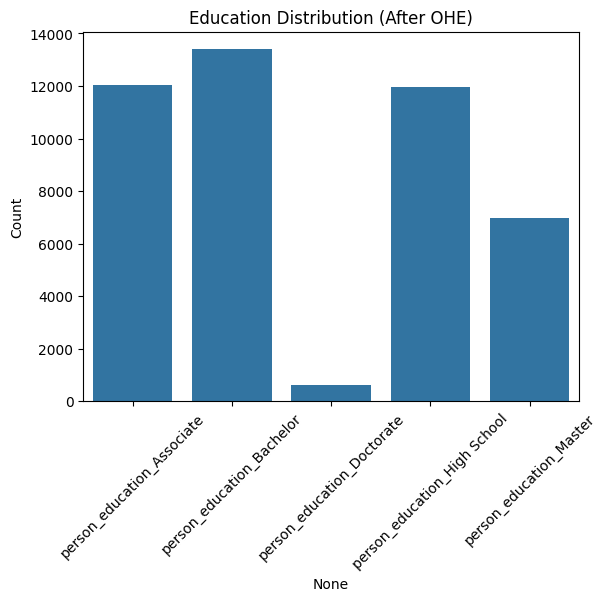

In [312]:
# 1. Education distribution after OHE
edu_cols = [col for col in data.columns if col.startswith("person_education_")]
sns.barplot(x=data[edu_cols].sum().index,
            y=data[edu_cols].sum().values)
plt.title("Education Distribution (After OHE)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

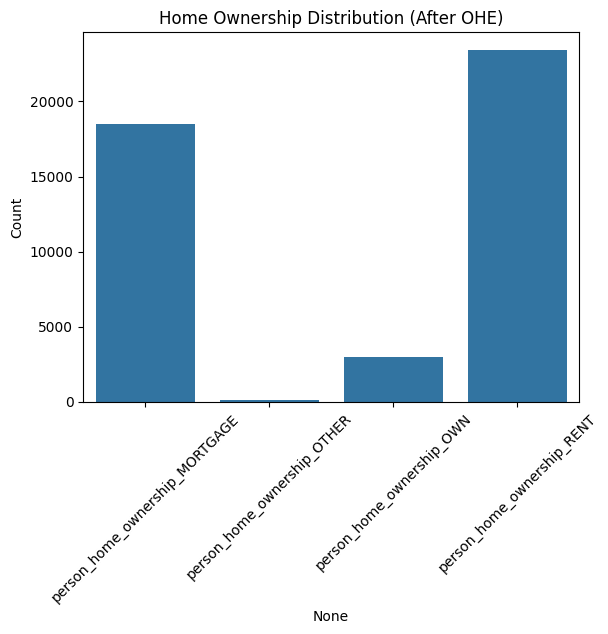

In [313]:
# 2. Home ownership distribution after OHE
home_cols = [col for col in data.columns if col.startswith("person_home_ownership_")]
sns.barplot(x=data[home_cols].sum().index,
            y=data[home_cols].sum().values)
plt.title("Home Ownership Distribution (After OHE)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

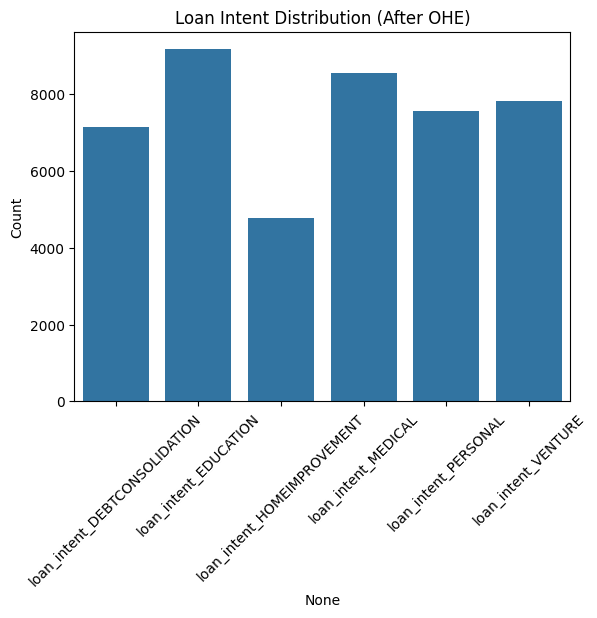

In [314]:
# 3. Loan intent distribution after OHE
loan_cols = [col for col in data.columns if col.startswith("loan_intent_")]
sns.barplot(x=data[loan_cols].sum().index,
            y=data[loan_cols].sum().values)
plt.title("Loan Intent Distribution (After OHE)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

# Step 04: Scaling

## I. Normalization

In [315]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns to scale
num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
            'credit_score']

# Initialize and apply scaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data[num_cols]), columns=num_cols)

df_scaled

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,0.105263,0.398015,0.000000,1.000000,0.748059,1.000000,0.074074,0.230072
1,0.052632,0.026651,0.000000,0.022131,0.403670,0.216216,0.000000,0.023551
2,0.263158,0.027622,0.162162,0.221306,0.525759,1.000000,0.074074,0.498188
3,0.157895,0.446594,0.000000,1.000000,0.692308,1.000000,0.000000,0.643116
4,0.210526,0.361835,0.054054,1.000000,0.624559,1.000000,0.148148,0.320652
...,...,...,...,...,...,...,...,...
44995,0.368421,0.248781,0.324324,0.641788,0.722653,0.837838,0.074074,0.534420
44996,0.894737,0.359750,0.918919,0.376221,0.610445,0.378378,0.666667,0.447464
44997,0.684211,0.304617,0.378378,0.100517,0.324629,0.135135,0.592593,0.617754
44998,0.473684,0.156622,0.216216,0.509004,0.551164,0.972973,0.296296,0.385870


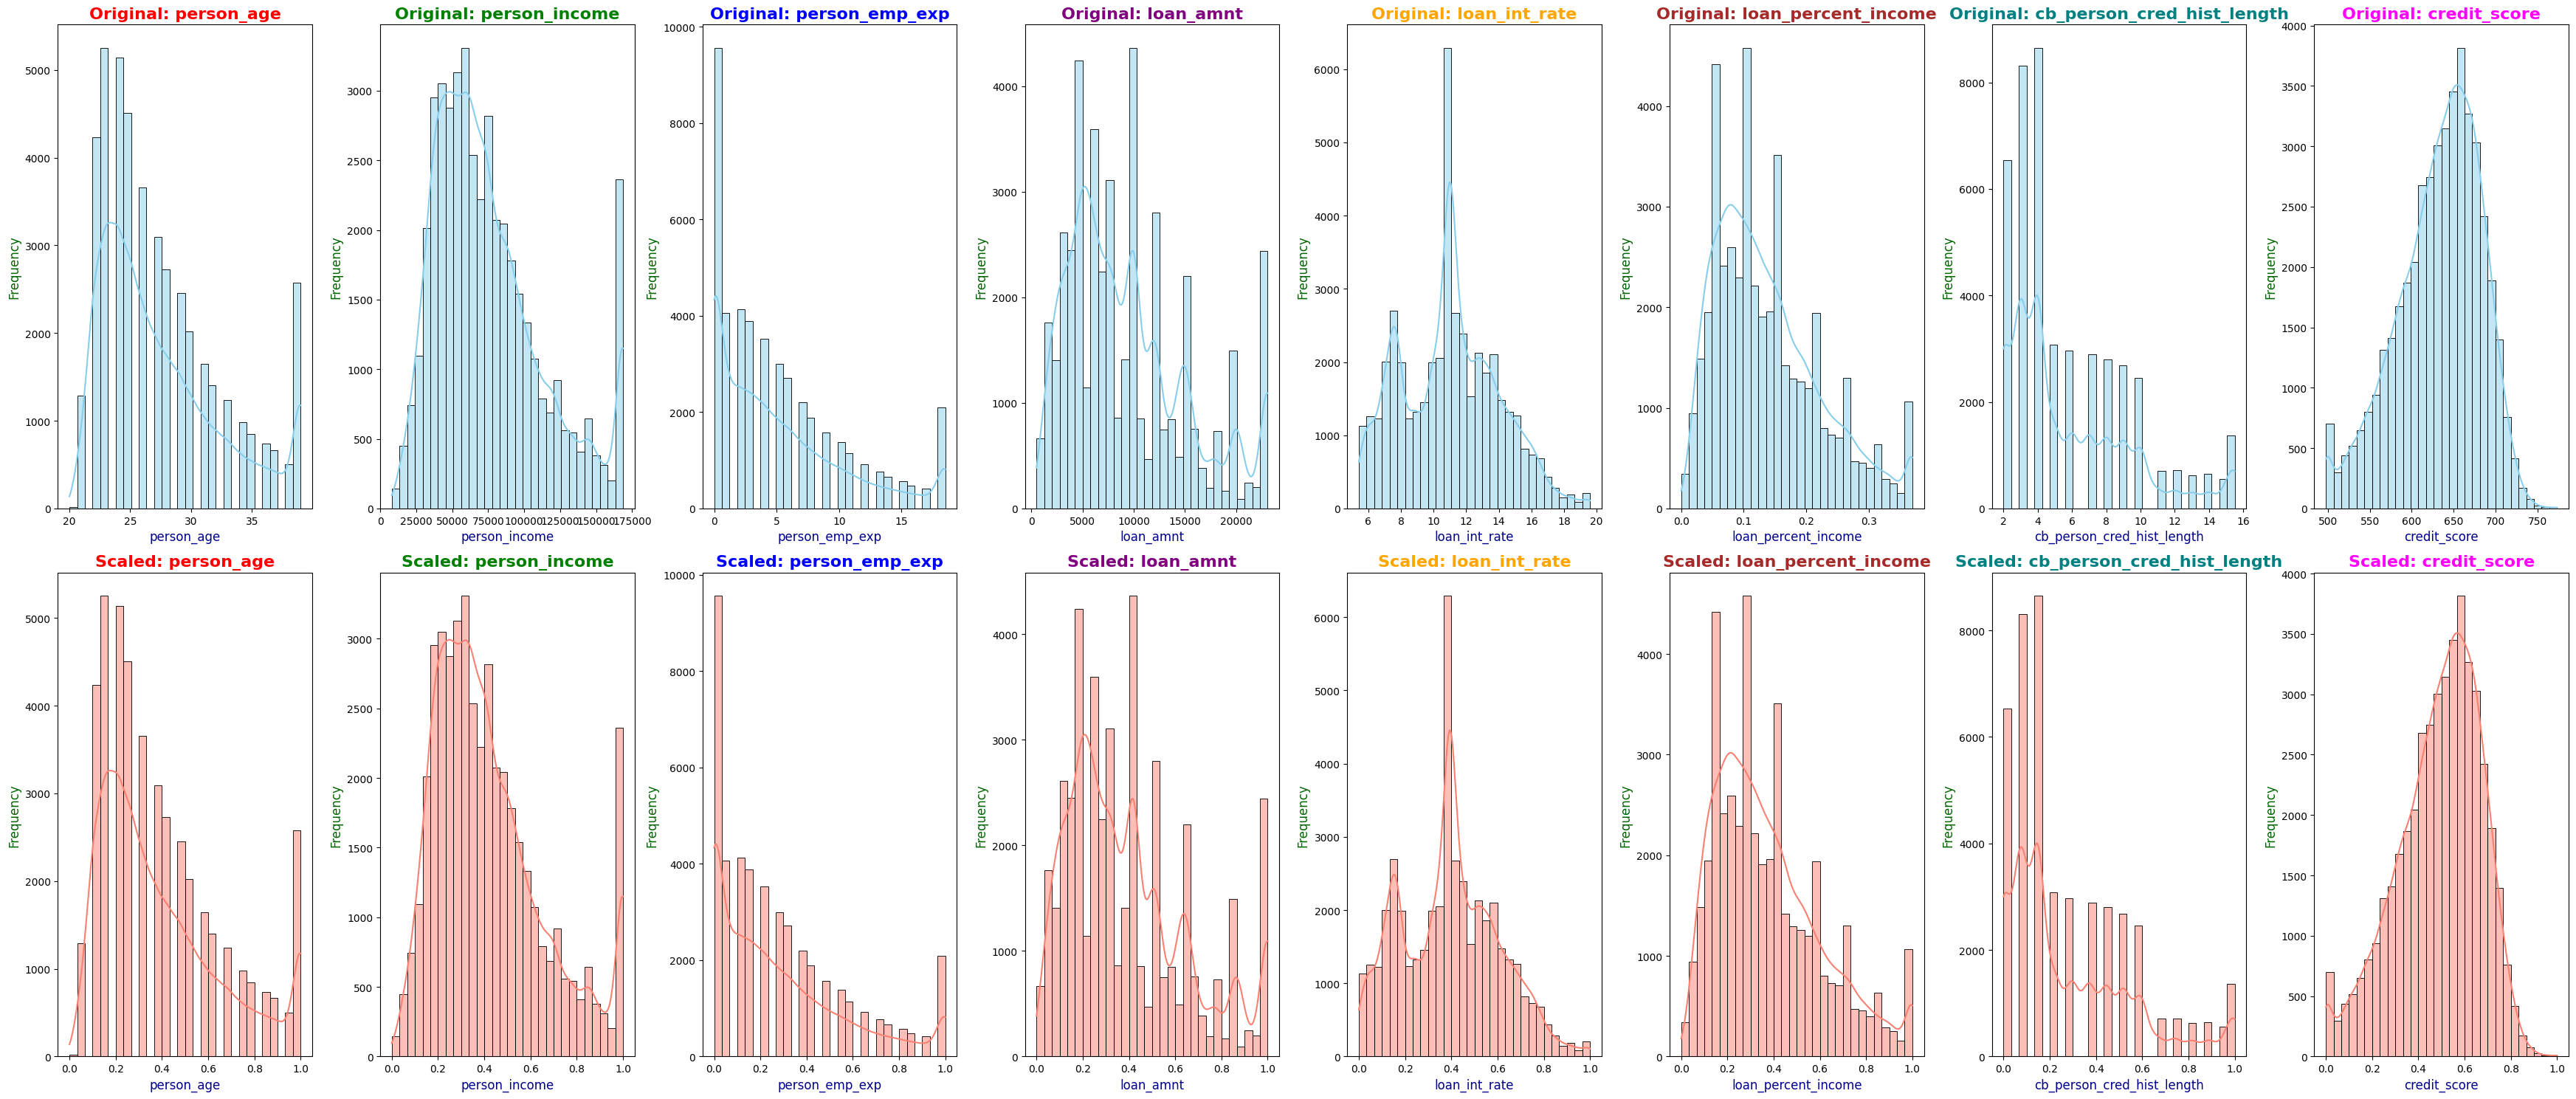

In [316]:
# Create large figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=len(num_cols), figsize=(35,15))

# Define colors for titles
colors = ["red", "green", "blue", "purple", "orange", "brown", "teal", "magenta"]

for i, col in enumerate(num_cols):
    # Original distribution
    sns.histplot(data[col], bins=30, ax=axes[0,i], kde=True, color="skyblue")
    axes[0,i].set_title(f"Original: {col}", fontsize=16, color=colors[i], fontweight="bold")
    axes[0,i].set_xlabel(col, fontsize=12, color="darkblue")
    axes[0,i].set_ylabel("Frequency", fontsize=12, color="darkgreen")
    
    # Scaled distribution
    sns.histplot(df_scaled[col], bins=30, ax=axes[1,i], kde=True, color="salmon")
    axes[1,i].set_title(f"Scaled: {col}", fontsize=16, color=colors[i], fontweight="bold")
    axes[1,i].set_xlabel(col, fontsize=12, color="darkblue")
    axes[1,i].set_ylabel("Frequency", fontsize=12, color="darkgreen")

# Adjust spacing
plt.tight_layout()
plt.show()
plt.close()


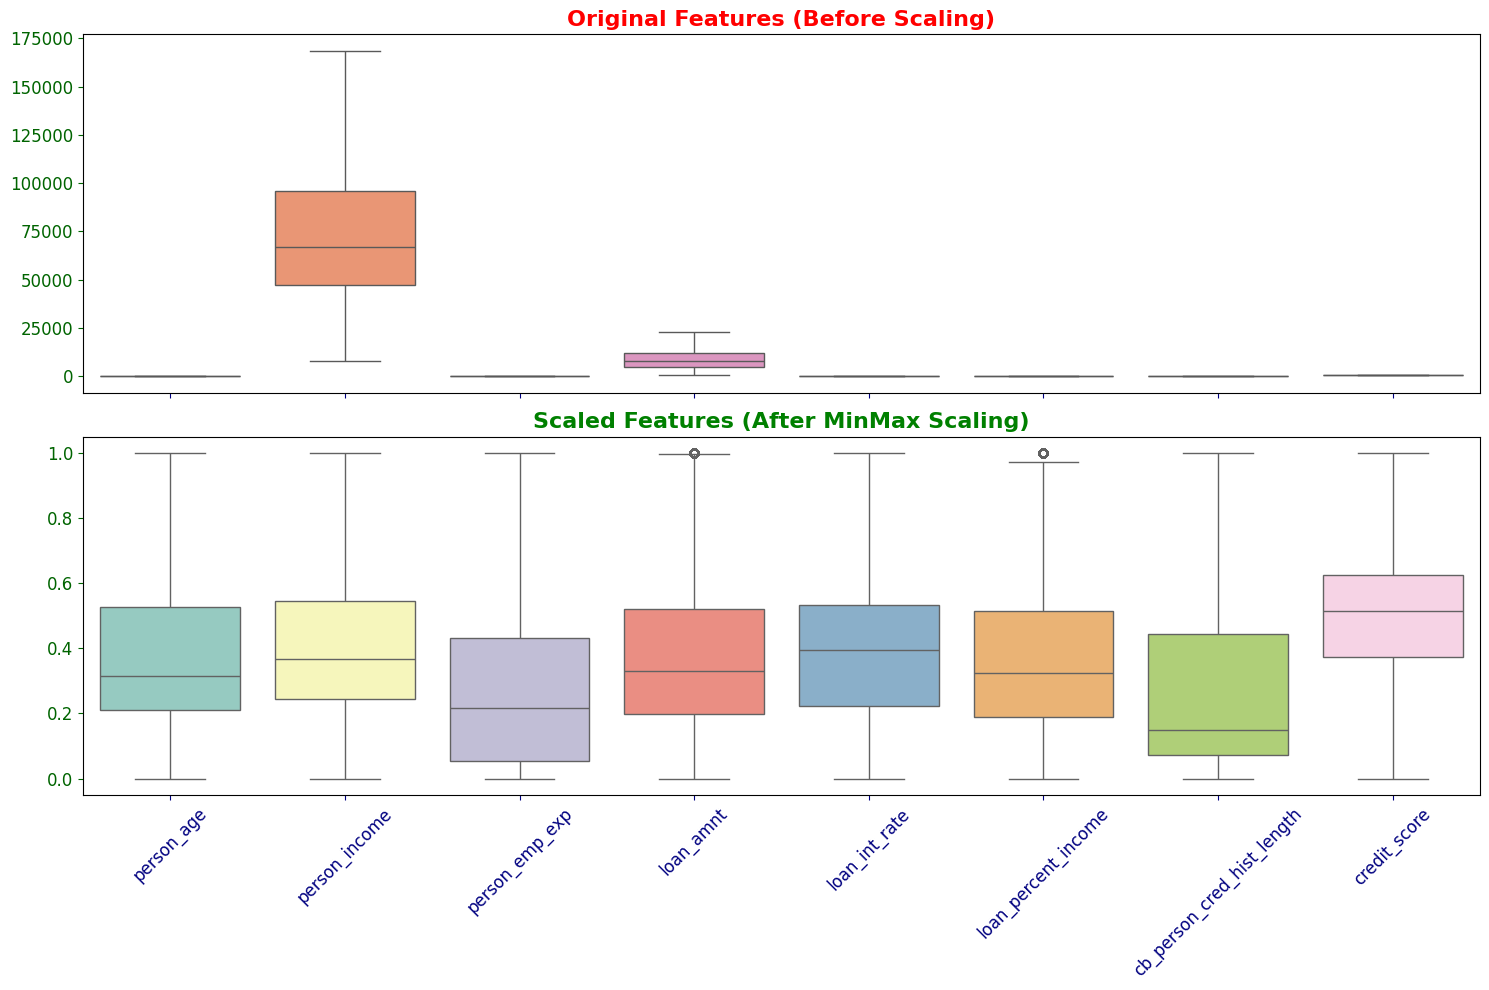

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10), sharex=True)

# Original Data
sns.boxplot(data=data[num_cols], ax=axes[0], palette="Set2")
axes[0].set_title("Original Features (Before Scaling)", fontsize=16, color="red", fontweight="bold")
axes[0].tick_params(axis="x", rotation=45, labelsize=12, colors="navy")
axes[0].tick_params(axis="y", labelsize=12, colors="darkgreen")

# Scaled Data
sns.boxplot(data=df_scaled[num_cols], ax=axes[1], palette="Set3")
axes[1].set_title("Scaled Features (After MinMax Scaling)", fontsize=16, color="green", fontweight="bold")
axes[1].tick_params(axis="x", rotation=45, labelsize=12, colors="navy")
axes[1].tick_params(axis="y", labelsize=12, colors="darkgreen")

plt.tight_layout()
plt.show()
plt.close()

## II. Standardization

In [318]:
# Identify the Target Variable
Target_column = "loan_status"
Y = data[Target_column]
X = data.drop(columns=[Target_column])

from sklearn.preprocessing import StandardScaler

num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
            'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 
            'credit_score']

In [319]:
sc = StandardScaler()

In [320]:
standardization = pd.DataFrame(sc.fit_transform(data[num_cols]), columns=num_cols)

In [321]:
standardization

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,-1.104408,-0.097958,-1.006482,2.345680,1.684900,2.740157,-0.777845,-1.441911
1,-1.307248,-1.665173,-1.006482,-1.442004,0.045135,-0.697519,-1.057273,-2.586471
2,-0.495889,-1.661076,-0.422485,-0.670516,0.626445,2.740157,-0.777845,0.044009
3,-0.901569,0.107052,-1.006482,2.345680,1.419446,2.740157,-1.057273,0.847209
4,-0.698729,-0.250645,-0.811817,2.345680,1.096870,2.740157,-0.498418,-0.939911
...,...,...,...,...,...,...,...,...
44995,-0.090210,-0.727749,0.161512,0.958180,1.563934,2.028914,-0.777845,0.244809
44996,1.938188,-0.259444,2.302835,-0.070470,1.029666,0.013724,1.457574,-0.237111
44997,1.126829,-0.492113,0.356178,-1.138380,-0.331204,-1.053141,1.178147,0.706649
44998,0.315470,-1.116677,-0.227819,0.443855,0.747412,2.621616,0.060437,-0.578471


In [322]:
#Graphs
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('Before ' + str(t).split('(')[0])

    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(t).split('(')[0])
    plt.show()
    plt.close()    

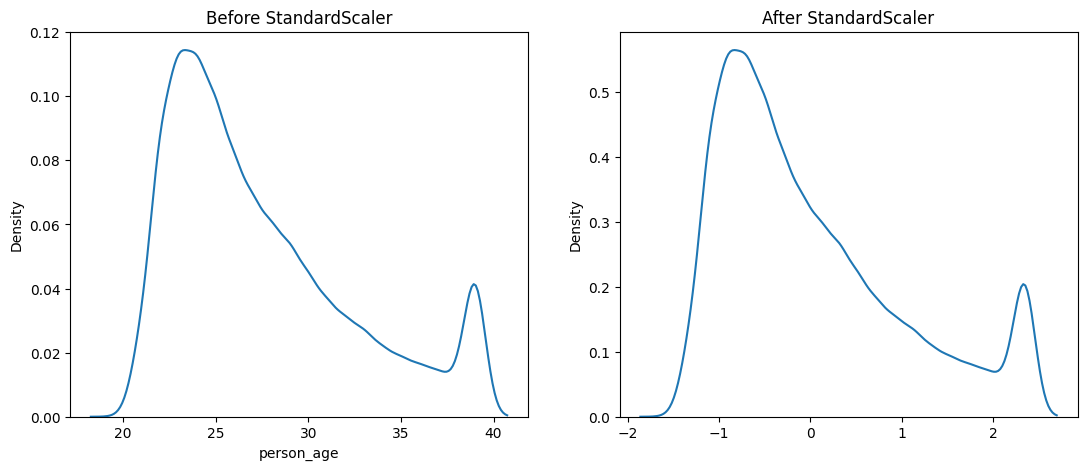

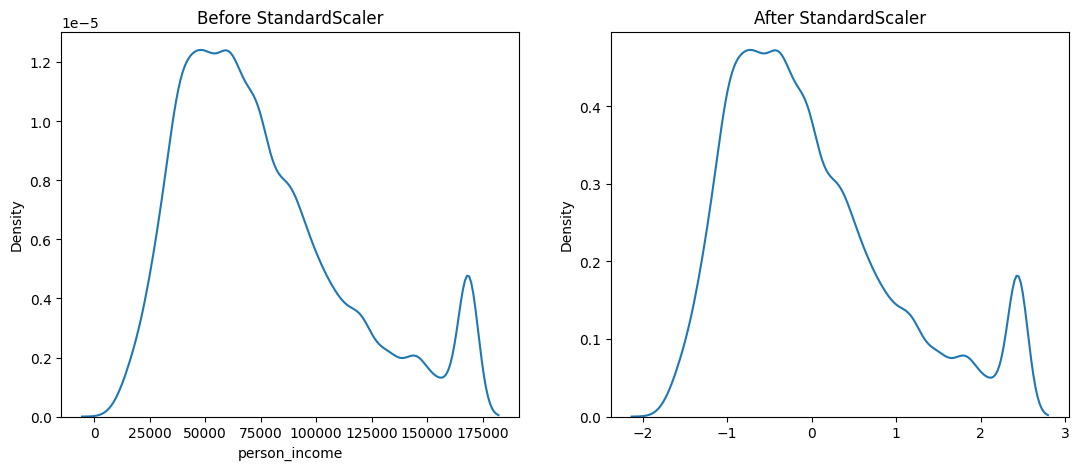

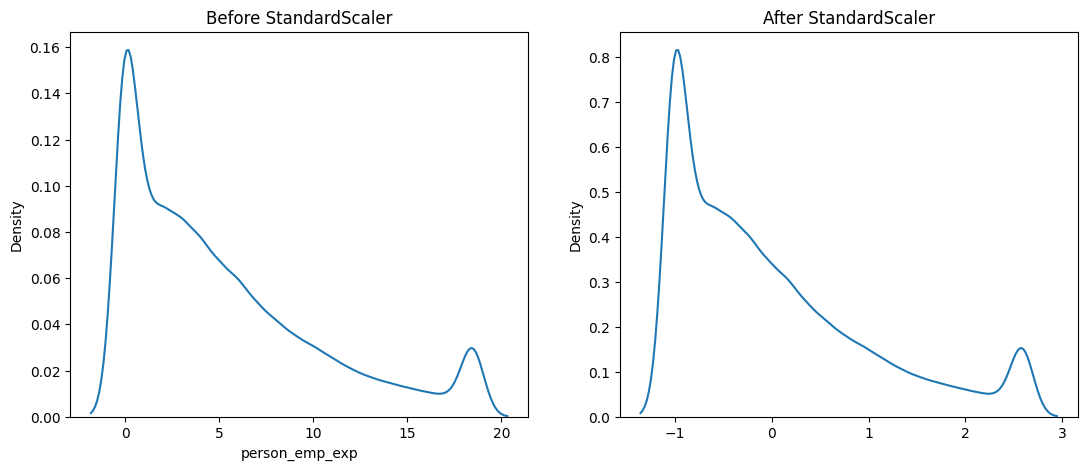

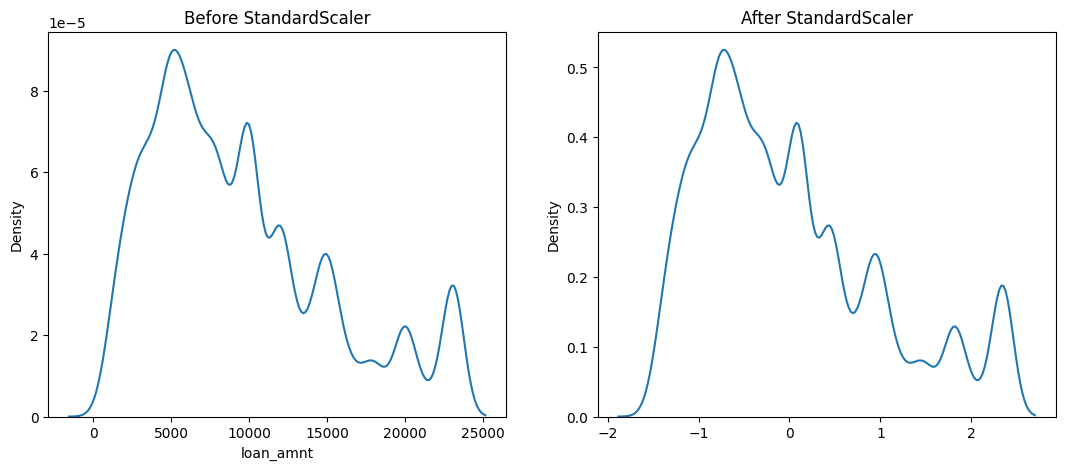

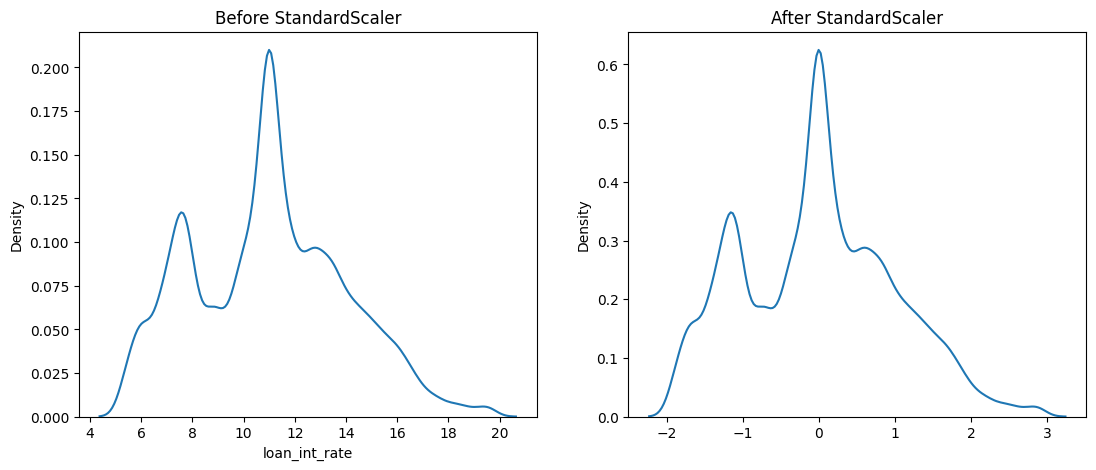

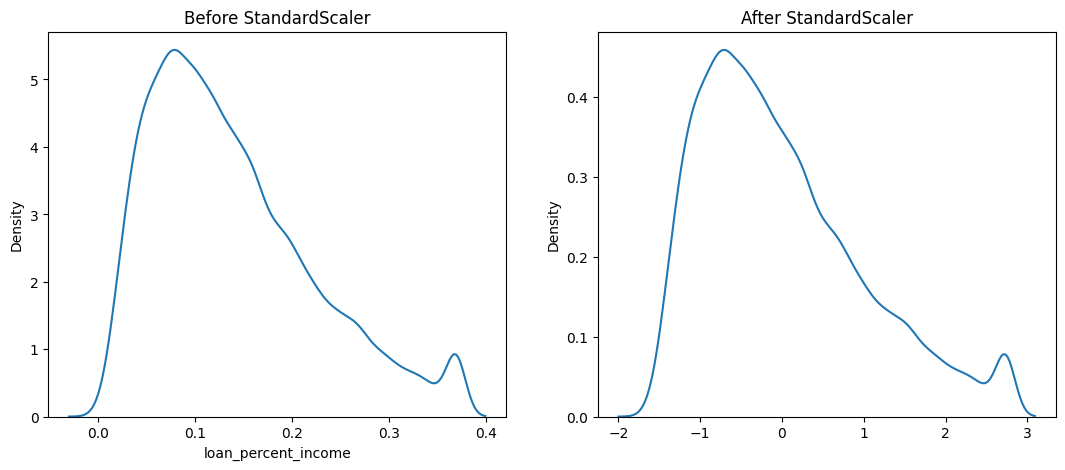

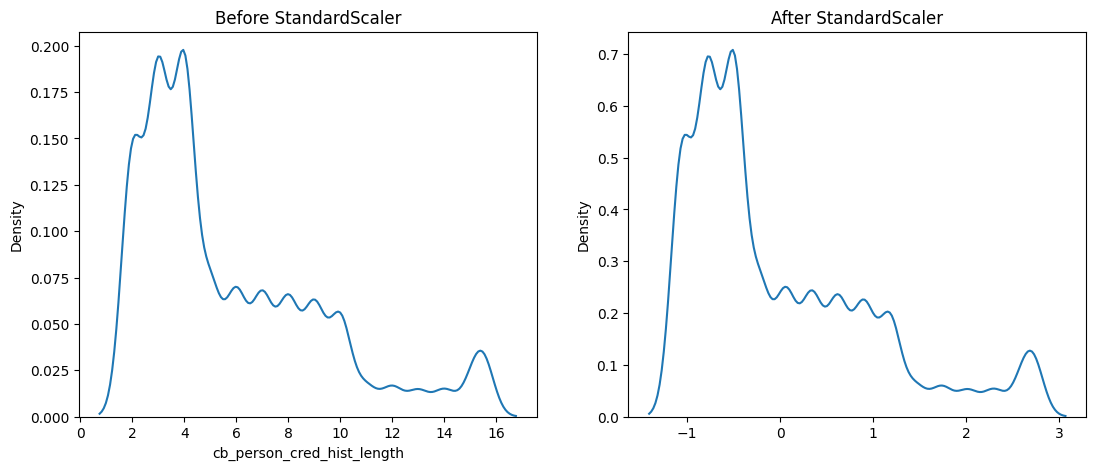

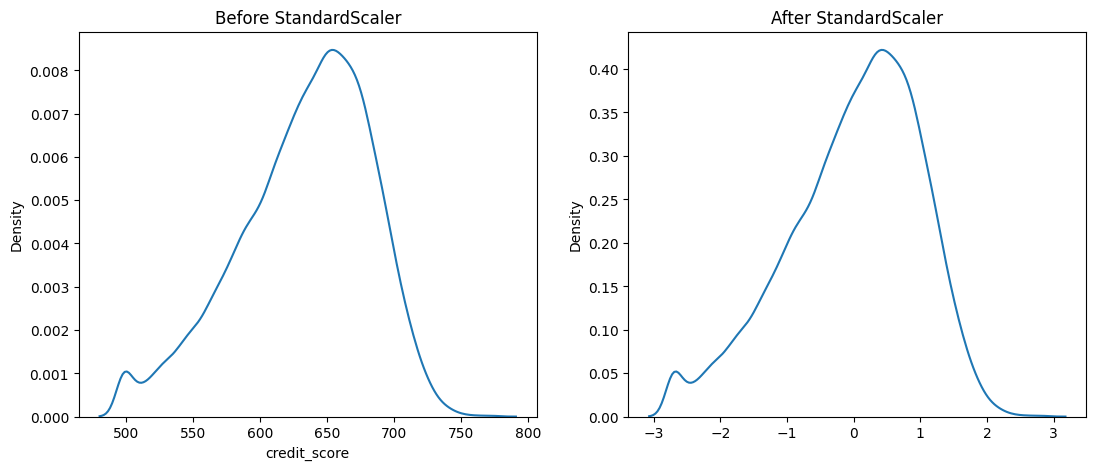

In [323]:
for col in num_cols:
    plots(X, col, StandardScaler())

# Step 05: Feature Selection

In [324]:
#Classification Problem

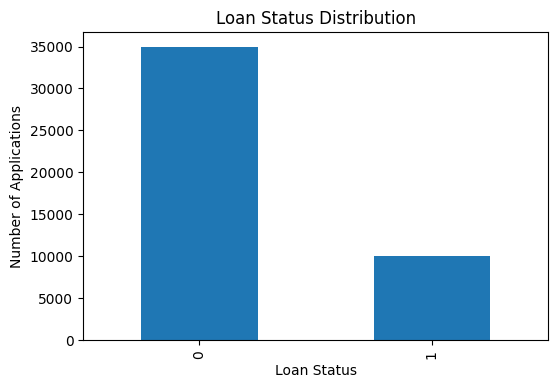

In [325]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
x_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

counts = data[Target_column].value_counts()

# Bar Chart
plt.figure(figsize=(6,4))
counts.plot(kind="bar")
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Number of Applications")
plt.show()

In [326]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [327]:
fs = SelectKBest(score_func = mutual_info_classif, k=10)
fs.fit(X,Y)

,score_func,<function mut...00188D65DC860>
,k,10


In [328]:
fs.scores_

array([0.00488722, 0.00647801, 0.08638516, 0.00141841, 0.01142055,
       0.07305419, 0.08039358, 0.00083522, 0.        , 0.19414423,
       0.        , 0.0008124 , 0.        , 0.00159745, 0.00116716,
       0.02657722, 0.00333588, 0.0082822 , 0.03743263, 0.        ,
       0.00403268, 0.        , 0.00397604, 0.        , 0.00519335])

In [329]:
mi_score = pd.Series(fs.scores_, index=X.columns)
mi_score

person_age                        0.004887
person_gender                     0.006478
person_income                     0.086385
person_emp_exp                    0.001418
loan_amnt                         0.011421
loan_int_rate                     0.073054
loan_percent_income               0.080394
cb_person_cred_hist_length        0.000835
credit_score                      0.000000
previous_loan_defaults_on_file    0.194144
person_education_Associate        0.000000
person_education_Bachelor         0.000812
person_education_Doctorate        0.000000
person_education_High School      0.001597
person_education_Master           0.001167
person_home_ownership_MORTGAGE    0.026577
person_home_ownership_OTHER       0.003336
person_home_ownership_OWN         0.008282
person_home_ownership_RENT        0.037433
loan_intent_DEBTCONSOLIDATION     0.000000
loan_intent_EDUCATION             0.004033
loan_intent_HOMEIMPROVEMENT       0.000000
loan_intent_MEDICAL               0.003976
loan_intent

<Axes: >

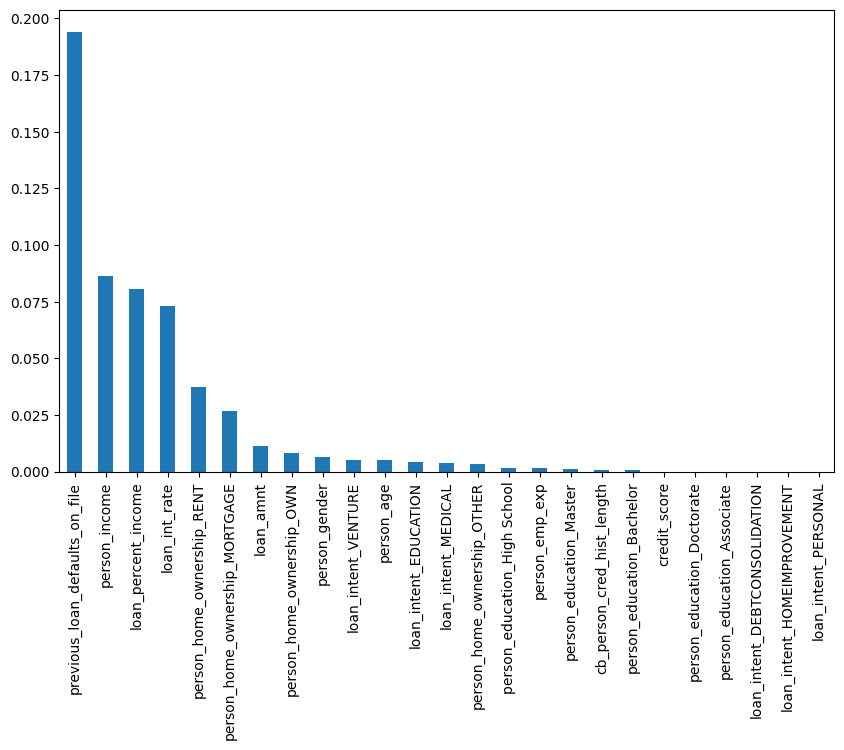

In [330]:
mi_score.sort_values(ascending=False).plot.bar(figsize=(10, 6))

In [331]:
X_selected = fs.fit_transform(X, Y)

In [332]:
selected_feature_indices = fs.get_support(indices=True)
selected_feature_names = x_encoded.columns[selected_feature_indices]

# Step 4: Create a new DataFrame with the selected data and column names
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_feature_names)

X_selected_df

,person_gender,person_income,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_VENTURE
0,0.0,71948.0,23093.125,16.02,0.37,0.0,0.0,0.0,1.0,0.0
1,0.0,12282.0,1000.000,11.14,0.08,1.0,0.0,1.0,0.0,0.0
2,0.0,12438.0,5500.000,12.87,0.37,0.0,1.0,0.0,0.0,0.0
3,0.0,79753.0,23093.125,15.23,0.37,0.0,0.0,0.0,1.0,0.0
4,1.0,66135.0,23093.125,14.27,0.37,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
44995,1.0,47971.0,15000.000,15.66,0.31,0.0,0.0,0.0,1.0,0.0
44996,0.0,65800.0,9000.000,14.07,0.14,0.0,0.0,0.0,1.0,0.0
44997,1.0,56942.0,2771.000,10.02,0.05,0.0,0.0,0.0,1.0,0.0
44998,1.0,33164.0,12000.000,13.23,0.36,0.0,0.0,0.0,1.0,0.0
